In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/anaemia-prediction/output.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv(r'/kaggle/input/anaemia-prediction/output.csv')

In [4]:
df

,Number,Sex,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
0,1,M,43.2555,30.8421,25.9025,6.3,Yes
1,2,F,45.6033,28.1900,26.2067,13.5,No
2,3,F,45.0107,28.9677,26.0215,11.7,No
3,4,F,44.5398,28.9899,26.4703,13.5,No
4,5,M,43.2870,30.6972,26.0158,12.4,No
...,...,...,...,...,...,...,...
99,100,F,49.9999,29.2860,20.7141,14.5,Yes
100,101,M,42.2324,30.6757,27.0919,6.3,Yes
101,102,F,45.6064,31.9084,22.4852,12.7,No
102,103,M,45.2095,29.2769,25.5136,13.4,No


In [5]:
df.shape

(104, 7)

In [6]:
df.columns

Index(['Number', 'Sex', '%Red Pixel', '%Green pixel', '%Blue pixel', 'Hb',
       'Anaemic'],
      dtype='object')

In [7]:
for x in df.columns:
    print(x)

Number
Sex
%Red Pixel
%Green pixel
%Blue pixel
Hb
Anaemic


In [8]:
df.head()

,Number,Sex,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
0,1,M,43.2555,30.8421,25.9025,6.3,Yes
1,2,F,45.6033,28.1900,26.2067,13.5,No
2,3,F,45.0107,28.9677,26.0215,11.7,No
3,4,F,44.5398,28.9899,26.4703,13.5,No
4,5,M,43.2870,30.6972,26.0158,12.4,No


In [9]:
df.tail()

,Number,Sex,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
99,100,F,49.9999,29.2860,20.7141,14.5,Yes
100,101,M,42.2324,30.6757,27.0919,6.3,Yes
101,102,F,45.6064,31.9084,22.4852,12.7,No
102,103,M,45.2095,29.2769,25.5136,13.4,No
103,104,F,43.5706,29.8094,26.6199,12.2,No


In [10]:
df.sample(5)

,Number,Sex,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
85,86,F,46.2550,27.2758,26.4692,11.0,No
37,38,M,47.2275,28.2526,24.5199,12.8,No
82,83,F,43.1335,29.3459,27.5206,10.4,Yes
70,71,F,44.1995,29.4860,26.3145,11.2,No
60,61,F,43.9224,29.8338,26.2437,12.1,No


In [11]:
df['Number']

0        1
1        2
2        3
3        4
4        5
      ... 
99     100
100    101
101    102
102    103
103    104
Name: Number, Length: 104, dtype: int64

In [12]:
df.dtypes


Number            int64
Sex              object
%Red Pixel      float64
%Green pixel    float64
%Blue pixel     float64
Hb              float64
Anaemic          object
dtype: object

In [13]:
df.dtypes

Number            int64
Sex              object
%Red Pixel      float64
%Green pixel    float64
%Blue pixel     float64
Hb              float64
Anaemic          object
dtype: object

In [14]:

df.select_dtypes('int')


,Number
0,1
1,2
2,3
3,4
4,5
...,...
99,100
100,101
101,102
102,103


In [15]:
df.select_dtypes('float')

,%Red Pixel,%Green pixel,%Blue pixel,Hb
0,43.2555,30.8421,25.9025,6.3
1,45.6033,28.1900,26.2067,13.5
2,45.0107,28.9677,26.0215,11.7
3,44.5398,28.9899,26.4703,13.5
4,43.2870,30.6972,26.0158,12.4
...,...,...,...,...
99,49.9999,29.2860,20.7141,14.5
100,42.2324,30.6757,27.0919,6.3
101,45.6064,31.9084,22.4852,12.7
102,45.2095,29.2769,25.5136,13.4


In [16]:
df.select_dtypes('object')

,Sex,Anaemic
0,M,Yes
1,F,No
2,F,No
3,F,No
4,M,No
...,...,...
99,F,Yes
100,M,Yes
101,F,No
102,M,No


In [17]:
df['Number'].describe()

count    104.000000
mean      52.500000
std       30.166206
min        1.000000
25%       26.750000
50%       52.500000
75%       78.250000
max      104.000000
Name: Number, dtype: float64

In [18]:
df['Hb'].describe()

count    104.000000
mean      12.150962
std        2.512957
min        2.800000
25%       10.650000
50%       12.600000
75%       14.000000
max       16.300000
Name: Hb, dtype: float64

<Axes: ylabel='Frequency'>

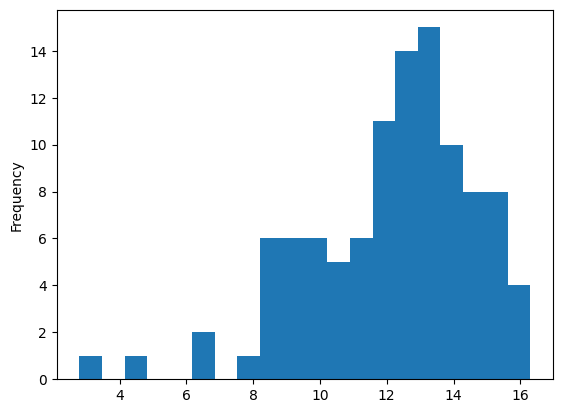

In [19]:
df['Hb'].plot(kind = 'hist', bins = 20)

<Axes: ylabel='Density'>

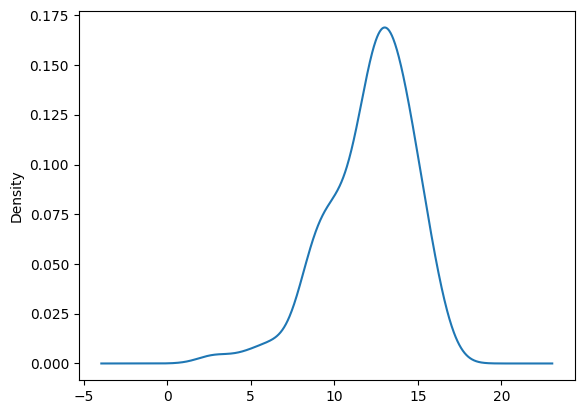

In [20]:
df['Hb'].plot(kind = 'kde')

In [21]:
df['Hb'].skew()

-0.9508943518288202

<Axes: >

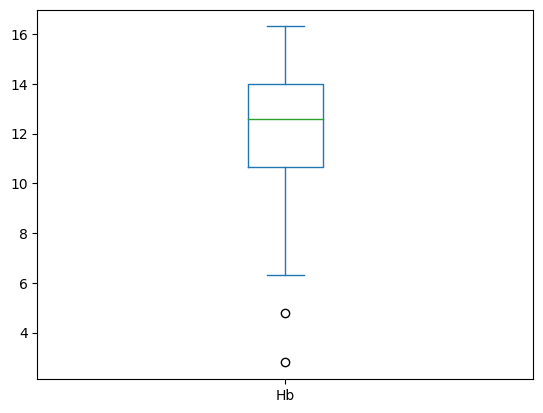

In [22]:
df['Hb'].plot(kind = 'box')

In [23]:
df.describe()

,Number,%Red Pixel,%Green pixel,%Blue pixel,Hb
count,104.000000,104.000000,104.000000,104.000000,104.000000
mean,52.500000,45.654175,28.875507,25.470325,12.150962
std,30.166206,2.816294,1.554275,1.984671,2.512957
min,1.000000,38.796800,25.140300,19.541300,2.800000
25%,26.750000,43.911375,27.871300,24.896425,10.650000
50%,52.500000,45.385350,28.948750,25.953200,12.600000
75%,78.250000,46.968325,29.887275,26.721600,14.000000
max,104.000000,54.647800,32.368100,29.841400,16.300000


In [24]:
df[df['Number']> 100]

,Number,Sex,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
100,101,M,42.2324,30.6757,27.0919,6.3,Yes
101,102,F,45.6064,31.9084,22.4852,12.7,No
102,103,M,45.2095,29.2769,25.5136,13.4,No
103,104,F,43.5706,29.8094,26.6199,12.2,No


In [25]:
df[df['Sex'] == 'M']

,Number,Sex,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
0,1,M,43.2555,30.8421,25.9025,6.3,Yes
5,6,M,45.0994,27.9645,26.9361,16.2,No
15,16,M,45.5842,28.7311,25.6848,14.0,No
24,25,M,45.6906,30.0735,24.2359,9.1,Yes
27,28,M,44.3297,28.7617,26.9086,14.1,No
28,29,M,47.8913,27.0952,25.0135,14.6,No
29,30,M,42.2473,30.2089,27.5438,13.7,No
30,31,M,44.2572,29.6578,26.0850,12.9,No
32,33,M,42.1652,29.3907,28.4441,13.4,No
33,34,M,45.4434,28.3301,26.2265,14.5,No


In [26]:
df[df['Sex'] == 'F']

,Number,Sex,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
1,2,F,45.6033,28.1900,26.2067,13.5,No
3,4,F,44.5398,28.9899,26.4703,13.5,No
6,7,F,43.1457,30.1628,26.6915,8.6,Yes
8,9,F,45.0423,29.1660,25.7918,13.0,No
9,10,F,46.5143,27.4282,26.0575,9.7,Yes
10,11,F,45.3506,29.1248,25.5246,12.6,No
11,12,F,44.4062,28.9298,26.6640,15.4,No
12,13,F,44.9642,30.5279,24.5079,4.8,Yes
16,17,F,42.5358,30.1604,27.3039,10.0,Yes
17,18,F,44.0957,29.9973,25.9070,8.3,Yes


In [27]:
df[df['Anaemic'] == 'Yes']

,Number,Sex,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
0,1,M,43.2555,30.8421,25.9025,6.3,Yes
6,7,F,43.1457,30.1628,26.6915,8.6,Yes
9,10,F,46.5143,27.4282,26.0575,9.7,Yes
12,13,F,44.9642,30.5279,24.5079,4.8,Yes
13,14,M,45.0484,31.1049,23.8467,9.0,Yes
16,17,F,42.5358,30.1604,27.3039,10.0,Yes
17,18,F,44.0957,29.9973,25.9070,8.3,Yes
19,20,F,40.9365,31.9687,27.0948,9.9,Yes
24,25,M,45.6906,30.0735,24.2359,9.1,Yes
58,59,M,40.6395,32.1891,27.1714,2.8,Yes


In [28]:
df[['Sex', 'Number']]

,Sex,Number
0,M,1
1,F,2
2,F,3
3,F,4
4,M,5
...,...,...
99,F,100
100,M,101
101,F,102
102,M,103


In [29]:
df.isnull().sum()

Number          0
Sex             0
%Red Pixel      0
%Green pixel    0
%Blue pixel     0
Hb              0
Anaemic         0
dtype: int64